<a href="https://colab.research.google.com/github/shyammodi11/Binary-Classification-ML-Models/blob/main/CREDIT_CARD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement: 
For financial banks around the world, identifying credit card fraud is crucial. Banks have to spot potential fraud so that their costumers don't pay for goods they haven't purchased. This is important so that the customer doesn't lose money and the bank does not lose its customers.

The credit limit in credit cards helps in making purchases even when we don't have the amount at that time. But these features can be misused by cyber attackers to commit fraudulent transactions. Hence, the ultimate goal is to tackle this situation by building generalized classification models which tracks the pattern of all the transactions to classify and distinguish fraud transactions from the normal ones.
### This is a binary classification problem

In [ ]:
# importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset 
The dataset consists of 31 feature columns. Due to security issues, 28 of the features are the result of the PCA transformation. 'Time' and 'Amount are the only columns that were not modified with PCA. The output variable is named 'Class'.

In [ ]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Finding null/missing values

In [ ]:
# checking null values: There are no null values in this dataset
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
# Checkimg datatypes and consistency of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

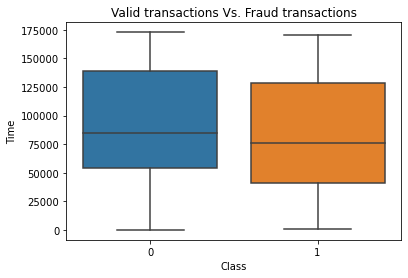

In [ ]:
sns.boxplot(data = df, x = 'Class', y = 'Time')
plt.title("Valid transactions Vs. Fraud transactions")
plt.show()

In [ ]:
df.shape

(284807, 31)

## Visualizing distributions 
Understanding data with respect to time and frequency. 
However, the dataset is heavily imbalanced. Only 0.17% of transactions are fraudulent.

In [ ]:
# Creating fraudulent dataframe
data_fraud = df[df['Class'] == 1]
# Creating non fraudulent dataframe
data_non_fraud = df[df['Class'] == 0]
print('Total percentage of fraud transactions:', data_fraud.shape[0]/df.shape[0]*100)

Total percentage of fraud transactions: 0.1727485630620034


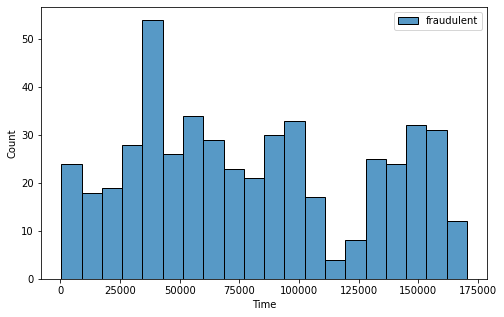

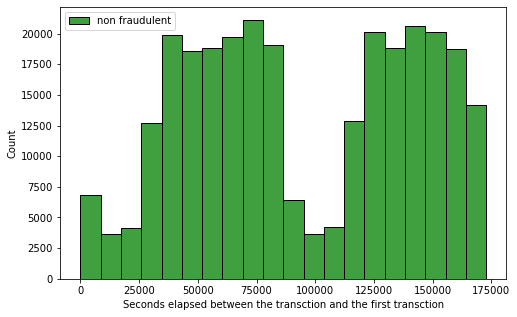

In [ ]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.histplot(data_fraud['Time'],label='fraudulent', bins = 20)
plt.legend()
plt.show()
plt.figure(figsize=(8,5))
ax = sns.histplot(data_non_fraud['Time'],label='non fraudulent', bins = 20, color = 'green')
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.legend()
plt.show()

In [ ]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
data_fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

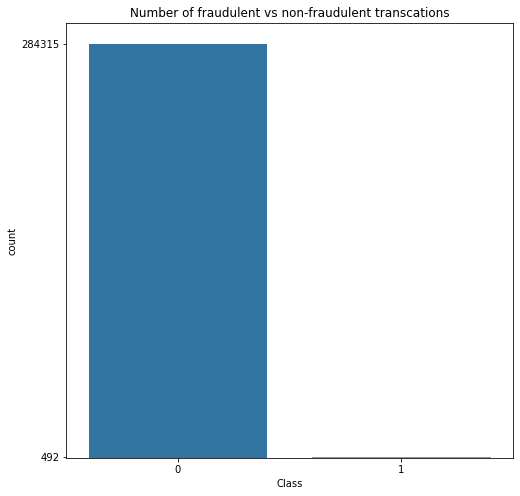

In [ ]:
# Bar plot for the number of fraudulent vs non-fraudulent transcations
# Class = 0 are normal, Class = 1 are fraudulent
plt.figure(figsize=(8,8))
sns.countplot(x='Class', data=df)
plt.title('Number of fraudulent vs non-fraudulent transcations')
plt.yticks(df['Class'].value_counts())
plt.show()

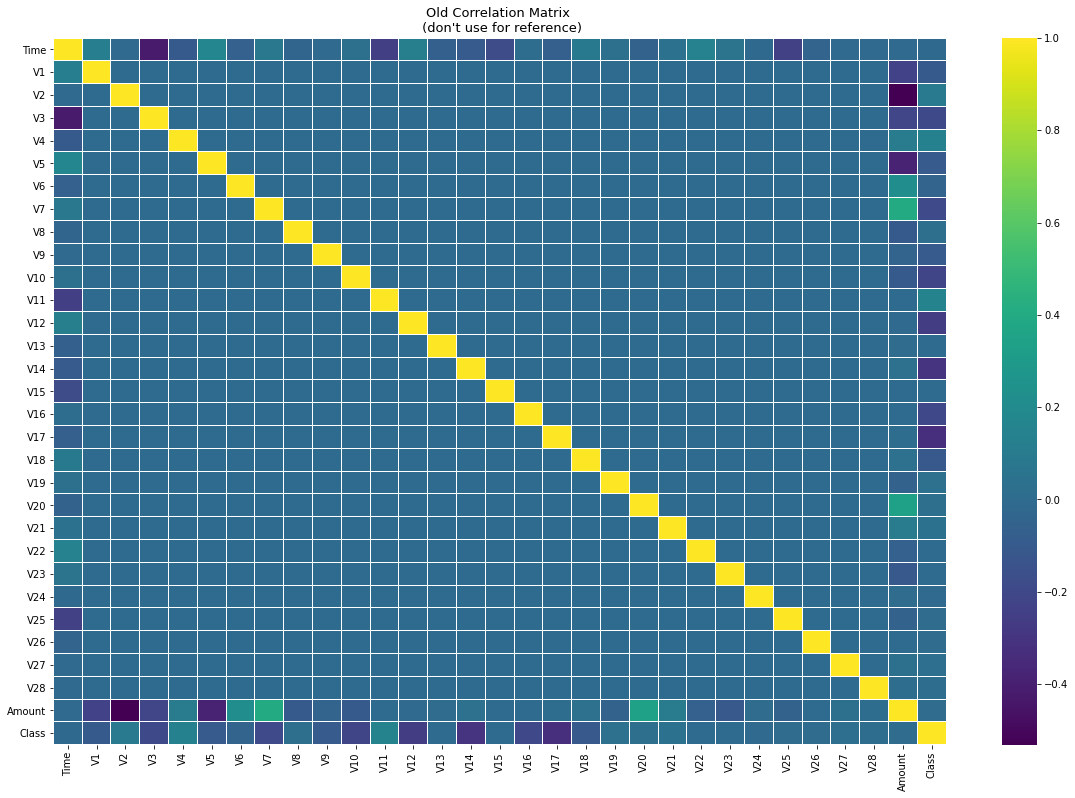

In [ ]:
# Check correlation between input variables with the output variable
corr = df.corr()
fig, ax = plt.subplots(figsize=(20,13))
sns.heatmap(corr, cmap='viridis', annot_kws={'size':20},linewidths= 0.05)
ax.set_title("Old Correlation Matrix \n (don't use for reference)", fontsize=13)
plt.show()

## Train-Test Split
Dividing data and sampling training/testing set to balance the output variable

In [ ]:
X = df.drop('Class', axis = 1)
Y = df['Class']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 1)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
# fit_resample() inbuilt method of RandomOverSampler() class

In [ ]:
X_train, Y_train = ros.fit_resample(X_train, Y_train)
X_test, Y_test = ros.fit_resample(X_test, Y_test)
pd.Series(Y_train).value_counts()

0    199007
1    199007
Name: Class, dtype: int64

In [ ]:
# the output variable is now balanced
pd.Series(Y_test).value_counts()

0    85308
1    85308
Name: Class, dtype: int64

## Model building and implementation
Building a generalized function to implement our classification algorithms

In [ ]:
def create_model(model):
    model.fit(X_train,Y_train)#train the model
    Y_pred=model.predict(X_test) #test
    print('Classification report\n')
    print(classification_report(Y_test,Y_pred))
    print("Confusion Matrix : ")
    #Confusion matrix
    print(confusion_matrix(Y_test,Y_pred))
    return model

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import classification_report

## Logistic Regression

In [ ]:
#Base Line Model means use Logistic Regression(we predict yes/no values then 
#use classification algorithm)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = create_model(lr)

Classification report

              precision    recall  f1-score   support

           0       0.88      0.97      0.92     85308
           1       0.97      0.87      0.91     85308

    accuracy                           0.92    170616
   macro avg       0.92      0.92      0.92    170616
weighted avg       0.92      0.92      0.92    170616

Confusion Matrix : 
[[82775  2533]
 [11365 73943]]


In [ ]:
Y_pred=lr.predict(X_test)
print("Accuracy of our model is:",accuracy_score(Y_test,Y_pred))
print("Recall value of our model is:", recall_score(Y_test,Y_pred))

Accuracy of our model is: 0.9185422234725934
Recall value of our model is: 0.8667768556290149


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc1 = DecisionTreeClassifier(max_depth=5) # pruning technique applied: max_depth
dtc1 = create_model(dtc1) # by default uses : gini index

Classification report

              precision    recall  f1-score   support

           0       0.85      0.99      0.92     85308
           1       0.99      0.83      0.90     85308

    accuracy                           0.91    170616
   macro avg       0.92      0.91      0.91    170616
weighted avg       0.92      0.91      0.91    170616

Confusion Matrix : 
[[84721   587]
 [14487 70821]]


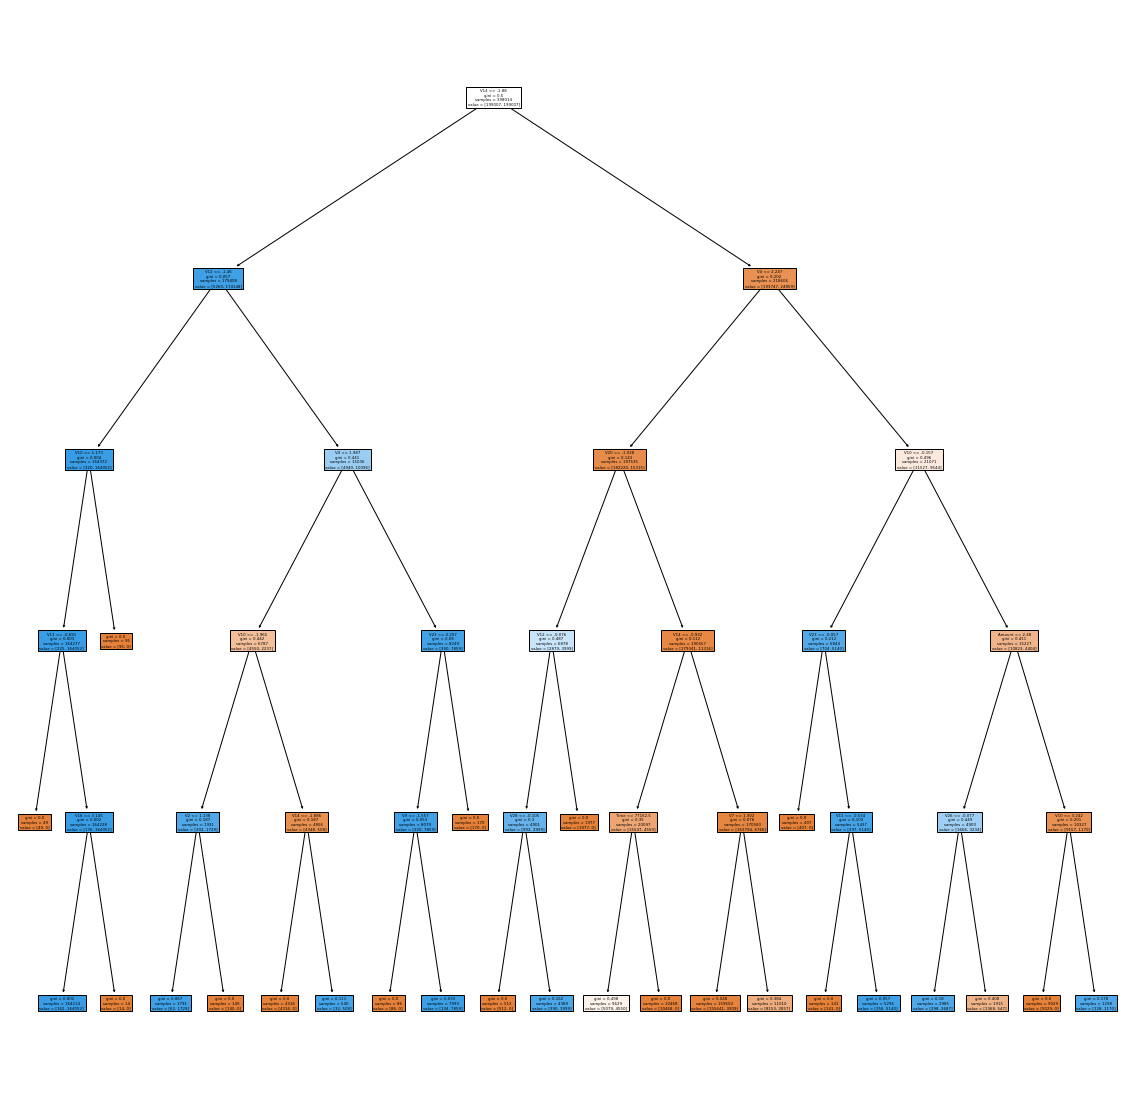

In [ ]:
from sklearn import tree
features = X.columns
fig = plt.figure(figsize = (20,20))
_= tree.plot_tree(dtc1, feature_names= features, filled = True)

In [ ]:
dtc2 = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=55, max_depth=5)
dtc2 = create_model(dtc2)

Classification report

              precision    recall  f1-score   support

           0       0.84      0.98      0.90     85308
           1       0.97      0.81      0.89     85308

    accuracy                           0.90    170616
   macro avg       0.91      0.90      0.89    170616
weighted avg       0.91      0.90      0.89    170616

Confusion Matrix : 
[[83346  1962]
 [15867 69441]]


In [ ]:
x = dtc2.feature_importances_
dic = {'Feature importance':x, 'Column':X.columns}
df2 = pd.DataFrame(dic).sort_values(ascending=False, by = 'Feature importance')[0:10]
print(df2)

    Feature importance  Column
14            0.832699     V14
4             0.069473      V4
29            0.045665  Amount
12            0.034439     V12
26            0.009934     V26
10            0.007287     V10
16            0.000504     V16
24            0.000000     V24
18            0.000000     V18
22            0.000000     V22


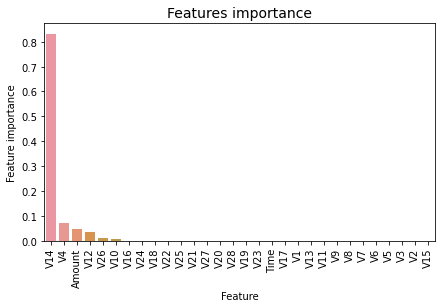

In [ ]:
tmp = pd.DataFrame({'Feature': X.columns, 'Feature importance': dtc2.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

## Random Forest

In [ ]:
# Random forest tree
# call random forest tree from package
from sklearn.ensemble import RandomForestClassifier
# call object of RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10, max_features = 25, random_state = 1, max_depth= 4, min_samples_leaf= 50)
rfc = create_model(rfc) 

Classification report

              precision    recall  f1-score   support

           0       0.87      0.99      0.93     85308
           1       0.99      0.85      0.92     85308

    accuracy                           0.92    170616
   macro avg       0.93      0.92      0.92    170616
weighted avg       0.93      0.92      0.92    170616

Confusion Matrix : 
[[84768   540]
 [12669 72639]]


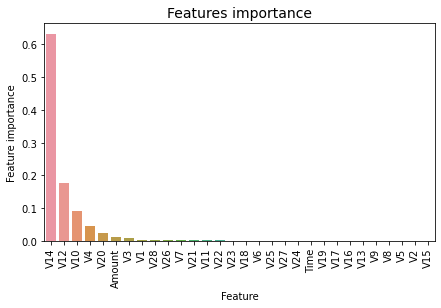

In [ ]:
tmp = pd.DataFrame({'Feature': X.columns, 'Feature importance': rfc.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

## Stacking (Ensembling techniques)

In [ ]:
#! pip install mlxtend
model_list = [lr, dtc2, rfc]
import six
import sys
sys.modules['sklearn.externals.six'] = six
from mlxtend.classifier import StackingClassifier

In [ ]:
sc = StackingClassifier(classifiers = model_list, meta_classifier = LogisticRegression())
sc = create_model(sc)

Classification report

              precision    recall  f1-score   support

           0       0.87      0.99      0.93     85308
           1       0.99      0.85      0.92     85308

    accuracy                           0.92    170616
   macro avg       0.93      0.92      0.92    170616
weighted avg       0.93      0.92      0.92    170616

Confusion Matrix : 
[[84607   701]
 [12669 72639]]


In [ ]:
Y_pred=sc.predict(X_test)
print("Accuracy of our stacking model is:",accuracy_score(Y_test,Y_pred))
print("Recall value of our model is:", recall_score(Y_test,Y_pred))

Accuracy of our stacking model is: 0.9216368922023725
Recall value of our model is: 0.8514910676607118


## Boosting techniques

In [ ]:
#1. ADA Boost
from sklearn.ensemble import AdaBoostClassifier
#Create the object of AdaBoostClassifier class and passing the no. of parameter
#in this class
ada=AdaBoostClassifier(n_estimators=10) # n_estimators can be <=100
ada = create_model(ada)

Classification report

              precision    recall  f1-score   support

           0       0.91      0.96      0.93     85308
           1       0.96      0.90      0.93     85308

    accuracy                           0.93    170616
   macro avg       0.93      0.93      0.93    170616
weighted avg       0.93      0.93      0.93    170616

Confusion Matrix : 
[[81939  3369]
 [ 8227 77081]]


In [ ]:
Y_pred=ada.predict(X_test)
print("Accuracy of our ADABoost model is:",accuracy_score(Y_test,Y_pred))
print("Recall value of our model is:", recall_score(Y_test,Y_pred))

Accuracy of our ADABoost model is: 0.9320345102452291
Recall value of our model is: 0.9035612134852534


In [ ]:
#2. Gradient boosting
# call GradientBoostingClassifier class from following package
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators = 60) # not>100
gbc = create_model(gbc)

Classification report

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     85308
           1       0.99      0.86      0.92     85308

    accuracy                           0.93    170616
   macro avg       0.93      0.93      0.93    170616
weighted avg       0.93      0.93      0.93    170616

Confusion Matrix : 
[[84607   701]
 [11973 73335]]


In [ ]:
#3. XGBoost
# ! pip install xgboost
from xgboost import XGBClassifier
xgc = XGBClassifier(n_estimators = 20, reg_alpha = 3)
xgc = create_model(xgc)

[01:57:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification report

              precision    recall  f1-score   support

           0       0.84      1.00      0.91     85308
           1       1.00      0.82      0.90     85308

    accuracy                           0.91    170616
   macro avg       0.92      0.91      0.91    170616
weighted avg       0.92      0.91      0.91    170616

Confusion Matrix : 
[[85196   112]
 [15762 69546]]


## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb = create_model(gnb)

Classification report

              precision    recall  f1-score   support

           0       0.77      0.99      0.87     85308
           1       0.99      0.71      0.83     85308

    accuracy                           0.85    170616
   macro avg       0.88      0.85      0.85    170616
weighted avg       0.88      0.85      0.85    170616

Confusion Matrix : 
[[84610   698]
 [24671 60637]]


## KNN

In [ ]:
# KNN works well with small number of input variables
# number of K is decided by cross validation
from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier(n_neighbors=5,algorithm="kd_tree", n_jobs = 16)
KNC = create_model(KNC)

Classification report

              precision    recall  f1-score   support

           0       0.55      1.00      0.71     85308
           1       0.99      0.18      0.30     85308

    accuracy                           0.59    170616
   macro avg       0.77      0.59      0.51    170616
weighted avg       0.77      0.59      0.51    170616

Confusion Matrix : 
[[85148   160]
 [70011 15297]]


# Conclusion
In this machine learning project, a binary classifier was implemented using various classification algorithms to predict 
potential fraud transactions. Through this project, several techniques were applied to address feature selection,
check correlation and treat major class imbalance problem.

28 features columns out of 31 are the result of the PCA transformation. The output variable is named 'Class'. 
Visualizing data distribution with respect to time and frequency was necessary. However, the dataset was heavily imbalanced. 
Only 0.17% of all transactions were fraudulent.

## Results
Looking at model results, the best accuracy on the test set was achieved by the boosting technique algorithms followed by Logistic Regression. Boosting is an ensemble meta-algorithm that converts weak learners to strong ones. Important features were showcased while using Decision tree and Random Forest.

#### Accuracy of  ADABoost model is: 0.9320345102452291
#### Recall value : 0.9035612134852534
##### F1 score: 0.93
    
#### Accuracy of Gradient Boosting model is: 0.93
#### Recall value: 0.86
##### F1 score: 0.92

Stacking and Random forest algorithms also performed well after some hyper-parameter tuning.

## Why KNN performed poorly 
KNN does not work well with large dataset: 
In large datasets, the cost of calculating the distance between the new point and each existing point is huge which 
degrades the performance of the algorithm. Does not work well with high dimensions or noise in data.

Focus was on getting optimal Recall score (reducing False-negatives) as machine predicting not fraud, but actual value being 
fraud would be a major concern for the company and would lead to a loss of customers. 
It also makes sense to compare F1 scores to get the model with the best score on jointly precision and recall.